In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv


In [5]:
from sklearn import preprocessing

In [6]:
pd.options.display.max_columns = 200
app_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
print('Training data shape: ', app_train.shape)
#app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
app_test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')
print('Testing data shape: ', app_test.shape)
#app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [8]:
sample_submission = pd.read_csv('/kaggle/input/home-credit-default-risk/sample_submission.csv')

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


### Шаг 1

Сделем простейший прогон, чтобы наконец-то начать эту домашку

Давайте для начала используем фичи из прошлой домашки. Чтобы их получить просто скопирую оттуда весь препроцессинг

#### Препроцессинг в итоге не повлиял на результат (как и должно было быть), поэтому я весь удалил

Возьмём пару фичей.
Попробуем кроссвалидировать и посмотрим, что у нас получится на деревьях с дефолтными параметрами

In [52]:
features = ['AMT_INCOME_TOTAL','AMT_CREDIT']

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

In [54]:
tree_model = DecisionTreeClassifier()

In [13]:
crosval = cross_val_score(tree_model, app_train[features],  y = app_train['TARGET'],
                          cv = 5, scoring= 'roc_auc')
print("tree_model:",max(crosval), min(crosval))
print(crosval)
print("mean = ", np.mean(crosval))

# mean = 0.545016172569874 for features = ['AMT_INCOME_TOTAL_log_norm','AMT_CREDIT_log_norm']
# mean = 0.5450971934114491 for features = ['AMT_INCOME_TOTAL','AMT_CREDIT']

tree_model: 0.5475485160702587 0.5391874333863326


### Шаг 2.1 (failed)

Дальше я возьму все те же параметры, что были в прошлой домашке и попробую потренить модель на них

**Единственное, что в итоге понадобилось из этого блока:** Lable Encoding для категориальных признаков с 2-мя вариантами

In [55]:
for col in ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    le = preprocessing.LabelEncoder()
    le.fit(app_train[col])
    app_train[col] = le.transform(app_train[col])
    app_test[col] = le.transform(app_test[col])

#### Добавление фичей только ухудшило результат  :(

### Шаг 2.2 (ok)

Добавим всё-таки ещё фичей, а то как-то стрёмно всё получается

In [44]:
#Тут я проверял разные столбцы, которые оказались важными по итогам прошлой домашки
app_train['EXT_SOURCE_2'].isnull().sum()

0

In [56]:
#Заполняем пропуски в сэмплах
mean = app_train['AMT_GOODS_PRICE'].mean()
app_train['AMT_GOODS_PRICE'] = app_train['AMT_GOODS_PRICE'].fillna(mean)

mean = app_train['AMT_ANNUITY'].mean()
app_train['AMT_ANNUITY'] = app_train['AMT_ANNUITY'].fillna(mean)

mean = app_train['EXT_SOURCE_2'].mean()
app_train['EXT_SOURCE_2'] = app_train['EXT_SOURCE_2'].fillna(mean)

**По итогам проверки на кроссвалидации эти фичи показались неплохими:**

In [57]:
features = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','FLAG_OWN_CAR','DAYS_BIRTH',
            'DAYS_EMPLOYED','EXT_SOURCE_2']

# Шаг 3.1. Исследуем гиперпараметры для решающего дерева

In [58]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [59]:
#делим train на тестовую и тренировочную части
X_train, X_test, y_train, y_test = train_test_split(
    app_train, app_train['TARGET'], test_size=0.33, random_state=2020)

#### 1. Варьируем гиперпараметр "Максимальная глубина решающего дерева"

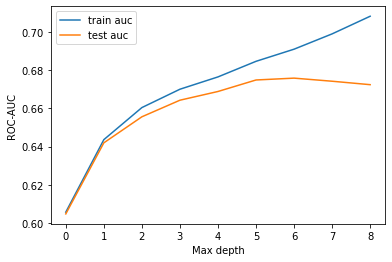

In [60]:
# max_depth
auc_train_list = []
auc_test_list = []

for m_depth in range(1,10):
    tree_model = DecisionTreeClassifier(random_state=2020, max_depth = m_depth)
    tree_model.fit(X_train[features], y_train)
    predict_test = tree_model.predict_proba(X_test[features])[:,1]
    predict_train = tree_model.predict_proba(X_train[features])[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test)
    auc_train = roc_auc_score(y_train, predict_train)
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('Max depth')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

#### 2. Варьируем гиперпараметр "Минимальное кол-во сэмплов на одном листе решающего дерева"

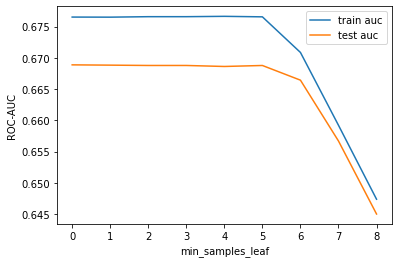

In [61]:
# min_samples_leaf
auc_train_list = []
auc_test_list = []

for m_samples in [1, 10, 20,50,100,1000, 10000, 20000, 30000]:
    tree_model = DecisionTreeClassifier(random_state=2020, max_depth = 5, min_samples_leaf = m_samples)
    tree_model.fit(X_train[features], y_train)
    predict_test = tree_model.predict_proba(X_test[features])[:,1]
    predict_train = tree_model.predict_proba(X_train[features])[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test)
    auc_train = roc_auc_score(y_train, predict_train)
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('min_samples_leaf')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

#### 3. Варьируем гиперпараметр "Минимальное кол-во сэмплов, которое можно делить"

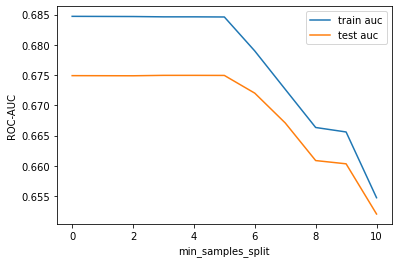

In [62]:
# min_samples_split
auc_train_list = []
auc_test_list = []

for m_samples in [2, 10, 50,100,500, 1000, 10000, 20000,30000, 40000, 50000]:
    tree_model = DecisionTreeClassifier(random_state=2020, max_depth = 6, min_samples_leaf = 1,
                                        min_samples_split = m_samples)
    tree_model.fit(X_train[features], y_train)
    predict_test = tree_model.predict_proba(X_test[features])[:,1]
    predict_train = tree_model.predict_proba(X_train[features])[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test)
    auc_train = roc_auc_score(y_train, predict_train)
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('min_samples_split')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

## Автоматический подбор параметров DecisionTreeClassifier (тут всё долго)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parametrs = { 'max_depth': range (1,6),
              'min_samples_leaf': range (1,6),
              'min_samples_split': range (2,7) }

In [ ]:
tree_model = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(tree_model, parametrs, cv=5)
print("wait...")
grid.fit(X_train[features], y_train)

grid.best_params_

In [ ]:
n_iter_search = 20
random_search = RandomizedSearchCV(tree_model, parametrs, cv=5, n_iter = n_iter_search)
print("wait...")
random_search.fit(X_train[features], y_train)

random_search.best_params_

# Шаг 3.1. Теперь то же самое для случайного леса
(исследуем гиперпараметры и используем автоматический подбор гиперпараметров)

In [63]:
from sklearn.ensemble import RandomForestClassifier

2
5
10
25
50


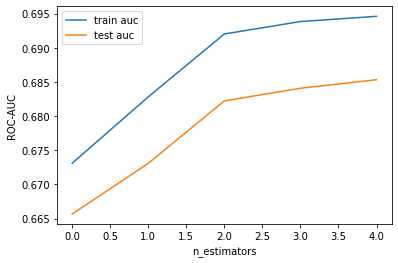

In [65]:
# n_estimators
auc_train_list = []
auc_test_list = []

for n_est in [2,5,10,25,50]:
    forest_model = RandomForestClassifier(random_state=2020, n_estimators = n_est, max_depth = 5)
    forest_model.fit(X_train[features], y_train)
    predict_test = forest_model.predict_proba(X_test[features])[:,1]
    predict_train = forest_model.predict_proba(X_train[features])[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test)
    auc_train = roc_auc_score(y_train, predict_train)
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    print(n_est)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('n_estimators')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

In [ ]:
# max_depth
auc_train_list = []
auc_test_list = []

for m_depth in range(1,10):
    forest_model = RandomForestClassifier(random_state=2020, n_estimators = 50, max_depth = m_depth)
    forest_model.fit(X_train[features], y_train)
    predict_test = forest_model.predict_proba(X_test[features])[:,1]
    predict_train = forest_model.predict_proba(X_train[features])[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test)
    auc_train = roc_auc_score(y_train, predict_train)
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('max_depth')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

In [ ]:
# max_depth
auc_train_list = []
auc_test_list = []

for m_sam in [1,10,100,1000,10000]:
    forest_model = RandomForestClassifier(random_state=2020, n_estimators = 50, max_depth = 5,
                                          min_samples_leaf = m_sam)
    forest_model.fit(X_train[features], y_train)
    predict_test = forest_model.predict_proba(X_test[features])[:,1]
    predict_train = forest_model.predict_proba(X_train[features])[:,1]
    
    auc_test = roc_auc_score(y_test, predict_test)
    auc_train = roc_auc_score(y_train, predict_train)
    
    auc_train_list.append(auc_train)
    auc_test_list.append(auc_test)
    
plt.plot(auc_train_list, label = 'train auc')
plt.plot(auc_test_list, label = 'test auc')
plt.xlabel('min_samples_leaf')
plt.ylabel('ROC-AUC')
plt.legend()
plt.show()

## Автоматический подбор параметров RandomForestClassifier (тут всё долго)

In [49]:
parametrs = { 'max_depth': range (2,6),
              'min_samples_leaf': range (1,8,2),
              'n_estimators': range (2,52,25) }

forest_model = RandomForestClassifier()

In [51]:
grid = GridSearchCV(forest_model, parametrs, cv=5)
print("wait...")
grid.fit(X_train[features], y_train)

grid.best_params_
#'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 2

wait...


{'max_depth': 4, 'min_samples_leaf': 1, 'n_estimators': 2}

In [50]:
n_iter_search = 20
random_search = RandomizedSearchCV(forest_model, parametrs, cv=5, n_iter = n_iter_search)
print("wait...")
random_search.fit(X_train[features], y_train)

random_search.best_params_
#'n_estimators': 2, 'min_samples_leaf': 1, 'max_depth': 3

wait...


{'n_estimators': 2, 'min_samples_leaf': 1, 'max_depth': 3}

# Шаг 5. Оценка важности признаков с помощью случайного леса 

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [21]:
selector = ExtraTreesClassifier()
selector.fit(app_train[features],app_train[['TARGET']])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesClassifier()

In [26]:
selector.feature_importances_

array([0.13504243, 0.12476463, 0.14344164, 0.10902718, 0.00318107,
       0.16114767, 0.13827691, 0.18511847])

In [36]:
#Оставим 5 фичей
features2 = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_BIRTH',
            'DAYS_EMPLOYED','EXT_SOURCE_2']

## Вот модель, обученная на 7 признаках

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=2020, n_estimators = 4, max_depth = 4,
                                          min_samples_leaf = 2)

In [39]:
crosval = cross_val_score(forest_model, app_train[features],  y = app_train['TARGET'],
                          cv = 5, scoring= 'roc_auc')
print(crosval)
print("tree_model:",max(crosval), min(crosval))
print("mean = ", np.mean(crosval))

[0.66038479 0.66928017 0.66805584 0.66609091 0.66410149]
tree_model: 0.6692801720342911 0.6603847875424884
mean =  0.6655826409440548


## Вот модель, обученая на 5-ти признаках с наибольшей важностью

In [38]:
crosval = cross_val_score(forest_model, app_train[features2],  y = app_train['TARGET'],
                          cv = 5, scoring= 'roc_auc')
print(crosval)
print("tree_model:",max(crosval), min(crosval))
print("mean = ", np.mean(crosval))

[0.6685391  0.67202127 0.66890041 0.66664067 0.6701771 ]
tree_model: 0.6720212744836316 0.6666406710059701
mean =  0.6692557113669773


Средняя оценка выросла на 0,004 (воспроизводится при перезапуске)

## Вот модель, обученная на 4-ёх признаках с наибольшей важностью

In [40]:
features3 = ['AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_BIRTH',
            'DAYS_EMPLOYED','EXT_SOURCE_2']

In [43]:
crosval = cross_val_score(forest_model, app_train[features3],  y = app_train['TARGET'],
                          cv = 5, scoring= 'roc_auc')
print(crosval)
print("tree_model:",max(crosval), min(crosval))
print("mean = ", np.mean(crosval))

[0.66810846 0.67392932 0.67382249 0.67082568 0.67487327]
tree_model: 0.6748732718672588 0.6681084625221472
mean =  0.6723118459654491


Средняя оценка выросла на примерно на 0,0035 (воспроизводится)

### Вывод: дополнительные малозначимые признаки в модели уменьшают её точность.
Похоже, что большое количество малозначимых признаков может запутывать деревья и отсекать эффективные варианты решения при выборе одной из веток с использованием малозначимого признака